# Machine Learning Internship Program at Prodigy InfoTech:¶

# Task-03:

Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.


In [1]:
pip install --upgrade paramiko cryptography

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: D:\New folder\python.exe -m pip install --upgrade pip


In [2]:
pip install cryptography

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: D:\New folder\python.exe -m pip install --upgrade pip


In [3]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)


In [4]:
import warnings
import cryptography

warnings.filterwarnings("ignore", category=DeprecationWarning, module='cryptography')


Best parameters found:  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 77.48%
Classification Report:
               precision    recall  f1-score   support

         Cat       0.83      0.74      0.78        61
         Dog       0.72      0.82      0.77        50

    accuracy                           0.77       111
   macro avg       0.78      0.78      0.77       111
weighted avg       0.78      0.77      0.78       111

Confusion Matrix:
 [[45 16]
 [ 9 41]]


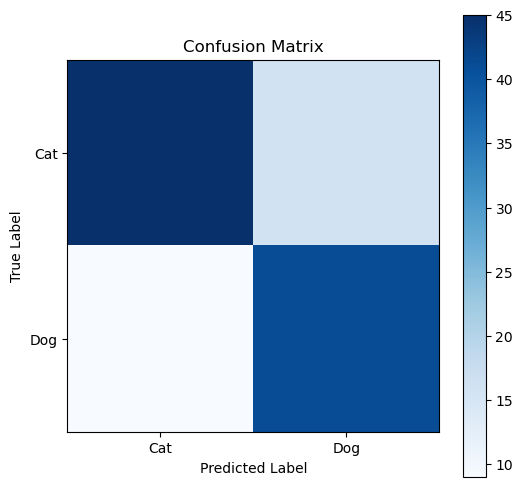


Total number of images loaded: 555
Number of Cat images: 278
Number of Dog images: 277


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


folder_path = r'C:\Users\Steve. W\Downloads\train'


img_size = 64


data = []
labels = []
file_names = []


for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith(('.png', '.jpg', '.jpeg', '.JPG', '.JPEG')):
            file_path = os.path.join(root, filename)
            
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) 
            
            img = cv2.resize(img, (img_size, img_size))
            
            hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
            
            data.append(hog_features)
            file_names.append(filename)
            if 'cat' in root.lower():
                labels.append(0)  
            elif 'dog' in root.lower():
                labels.append(1)  


data = np.array(data)
labels = np.array(labels)


X_train, X_test, y_train, y_test, file_names_train, file_names_test = train_test_split(
    data, labels, file_names, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


parameters = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
svm = GridSearchCV(SVC(), parameters, cv=5)
svm.fit(X_train, y_train)


print("Best parameters found: ", svm.best_params_)


y_pred = svm.predict(X_test)


label_map = {0: 'Cat', 1: 'Dog'}


predictions = [(file_names_test[i], label_map[y_pred[i]], labels[i]) for i in range(len(y_pred))]


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Cat', 'Dog'])
plt.yticks([0, 1], ['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


num_images = len(file_names)
num_cats = labels.tolist().count(0)
num_dogs = labels.tolist().count(1)

print(f"\nTotal number of images loaded: {num_images}")
print(f"Number of Cat images: {num_cats}")
print(f"Number of Dog images: {num_dogs}")





In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


vgg = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


for layer in vgg.layers:
    layer.trainable = False


x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=vgg.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    folder_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    subset='training')

validation_generator = datagen.flow_from_directory(
    folder_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    subset='validation')


model.fit(train_generator, validation_data=validation_generator, epochs=10)




Found 445 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Epoch 1/10


D:\New folder\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5113 - loss: 0.7129 - val_accuracy: 0.6909 - val_loss: 0.6423
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7245 - loss: 0.5806 - val_accuracy: 0.7273 - val_loss: 0.5869
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7426 - loss: 0.5344 - val_accuracy: 0.7273 - val_loss: 0.5650
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7748 - loss: 0.4870 - val_accuracy: 0.7273 - val_loss: 0.5520
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8026 - loss: 0.4511 - val_accuracy: 0.7545 - val_loss: 0.5434
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8254 - loss: 0.4264 - val_accuracy: 0.7182 - val_loss: 0.5364
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8400 - loss: 0.4057 - val_accuracy: 0.7273 - val_loss: 0.5338
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8723 - loss: 0.3657 - val_accuracy: 0.7727 - val_loss: 0.5303
Epo

In [12]:

predictions = [(file_names_test[i], label_map[y_pred[i]], labels[i]) for i in range(len(y_pred))]


print("\nImage Classification Results:")
for filename, predicted_label, _ in predictions:
    print(f"Filename: {filename} | Classified as: {predicted_label}")



Image Classification Results:
Filename: cat_546.jpg | Classified as: Cat
Filename: dog_293.jpg | Classified as: Dog
Filename: cat_21.jpg | Classified as: Cat
Filename: dog_30.jpg | Classified as: Dog
Filename: cat_229.jpg | Classified as: Cat
Filename: dog_29.jpg | Classified as: Dog
Filename: dog_295.jpg | Classified as: Dog
Filename: cat_253.jpg | Classified as: Cat
Filename: dog_556.jpg | Classified as: Cat
Filename: dog_54.jpg | Classified as: Cat
Filename: cat_352.jpg | Classified as: Cat
Filename: cat_240.jpg | Classified as: Cat
Filename: dog_218.jpg | Classified as: Dog
Filename: cat_482.jpg | Classified as: Cat
Filename: dog_484.jpg | Classified as: Dog
Filename: cat_400.jpg | Classified as: Dog
Filename: cat_499.jpg | Classified as: Cat
Filename: cat_123.jpg | Classified as: Cat
Filename: cat_246.jpg | Classified as: Cat
Filename: dog_224.jpg | Classified as: Dog
Filename: dog_496.jpg | Classified as: Cat
Filename: dog_487.jpg | Classified as: Dog
Filename: cat_11.jpg | Clas